# Experiments


In [1]:
# Sanity check of your system and your brain :)
"A" == "A"

True

In [2]:
# for reproducibility
import numpy as np
random_seed=42
np.random.seed(random_seed)

# Preparing data and black (In Orange framework, it is simple and good)

import the dataset, train the classfier

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np

from prepare_dataset import prepare_adult_dataset,prepare_german_dataset,prepare_compas_dataset,prepare_pima_dataset,train_test_split_data
from utils import encoder_from_datatable


data_table,test_data_table = prepare_adult_dataset()

# data_table,test_data_table = prepare_german_dataset()

# data_table,test_data_table = prepare_compas_dataset()

# data_table, vali_data_table = train_test_split_data(data_table)
# data_table,test_data_table = prepare_pima_dataset()

print("shape of train set", data_table.X.shape)
# print("instances of evaluation set", vali_data_table.X.shape[0])
print("shape of test set", test_data_table.X.shape)

FileNotFoundError: [Errno 2] File b'./datasets/adult/adult_2.csv' does not exist: b'./datasets/adult/adult_2.csv'

In [4]:
print(data_table.domain)
print(data_table[0:10])

NameError: name 'data_table' is not defined

In [5]:

from prepare_blackbox import train_classifier

black_box_model = train_classifier(data_table,classifier_method='dnn',random_seed=random_seed)
# black_box_model = train_classifier(data_table,classifier_method='rf',random_seed=random_seed)


black_box = lambda x: black_box_model.predict(x)
# black_box = lambda x:  c.predict(scikit_encoder.transform(x))

print("now start sanity-check")
print("the first row of the dataset is (orginal form):\n", data_table[0] )
print("the predition of blackbox on the first row:\n", black_box( [data_table.X[0]]  )   )

print("train set data set size,",data_table.X.shape)
print("test setdata set size,",test_data_table.X.shape)
print("data set size,",data_table[:5])

now start sanity-check
the first row of the dataset is (orginal form):
 [20, Private, Some-college, Never-married, Other-service, Own-child, White, Female, 0, 0, 32, United-States | <=50K]
the predition of blackbox on the first row:
 [0.]
train set data set size, (43957, 12)
test setdata set size, (4885, 12)
data set size, [[20, Private, Some-college, Never-married, Other-service, Own-child, White, Female, 0, 0, 32, United-States | <=50K],
 [47, Private, Bachelors, Never-married, Sales, Own-child, White, Male, 0, 0, 40, United-States | <=50K],
 [35, Local-gov, HS-grad, Never-married, Adm-clerical, Unmarried, Amer-Indian-Eskimo, Male, 0, 0, 55, United-States | <=50K],
 [30, Private, Bachelors, Never-married, Sales, Own-child, White, Male, 0, 0, 40, United-States | >50K],
 [31, Self-emp-not-inc, Assoc-acdm, Married-civ-spouse, Other-service, Wife, White, Female, 0, 0, 35, United-States | >50K]]


A sanity check of train and test accuracy

In [10]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import sklearn
# predict_fn = lambda x: aml.predict(H2OFrame(x)).as_data_frame().iloc[:,0].to_numpy()

predict_fn = black_box

print('Train acc', accuracy_score(data_table.Y, predict_fn(data_table.X)))
print('Test acc', accuracy_score(test_data_table.Y, predict_fn(test_data_table.X)))

print('acc on training set', sklearn.metrics.accuracy_score(data_table.Y, predict_fn(data_table.X)))
print('f1 on training set', sklearn.metrics.f1_score(data_table.Y, predict_fn(data_table.X)))
print('recall on training set', sklearn.metrics.recall_score(data_table.Y, predict_fn(data_table.X)))
print('precision on training set', sklearn.metrics.precision_score(data_table.Y, predict_fn(data_table.X)))

print('acc on test set', sklearn.metrics.accuracy_score(test_data_table.Y, predict_fn(test_data_table.X)))
print('f1 on test set', sklearn.metrics.f1_score(test_data_table.Y, predict_fn(test_data_table.X)))
print('recall on test set', sklearn.metrics.recall_score(test_data_table.Y, predict_fn(test_data_table.X)))
print('precision on test set', sklearn.metrics.precision_score(test_data_table.Y, predict_fn(test_data_table.X)))


# print('test f1', f1_score(y_test, predict_fn(X_test)))
# print('test recall',recall_score(y_test, predict_fn(X_test)))
# print('test precision', precision_score(y_test, predict_fn(X_test)))


Train acc 0.9280660645630957
Test acc 0.8354145342886387
acc on training set 0.9280660645630957
f1 on training set 0.8416149068322982
recall on training set 0.7989538754160723
precision on training set 0.8890887924648111
acc on test set 0.8354145342886387
f1 on test set 0.6375112714156899
recall on test set 0.6032423208191127
precision on test set 0.6759082217973231


In [11]:
black_box = predict_fn

from utils import label_with_blackbox

predicted_data_table = label_with_blackbox(data_table,black_box)

predicted_test_data_table = label_with_blackbox(test_data_table,black_box)


print(predicted_data_table[:5])
print(predicted_data_table.X[:5])
print(predicted_data_table.X.shape[0])
print(predicted_test_data_table.X.shape[0])

print('sanity check, of acc,should be 100', accuracy_score(predicted_data_table.Y, predict_fn(predicted_data_table.X)))

--
[0. 0. 0. 0. 1.]
--
--
[0. 0. 1. 0. 1.]
--
[[20, Private, Some-college, Never-married, Other-service, Own-child, White, Female, 0, 0, 32, United-States | <=50K],
 [47, Private, Bachelors, Never-married, Sales, Own-child, White, Male, 0, 0, 40, United-States | <=50K],
 [35, Local-gov, HS-grad, Never-married, Adm-clerical, Unmarried, Amer-Indian-Eskimo, Male, 0, 0, 55, United-States | <=50K],
 [30, Private, Bachelors, Never-married, Sales, Own-child, White, Male, 0, 0, 40, United-States | <=50K],
 [31, Self-emp-not-inc, Assoc-acdm, Married-civ-spouse, Other-service, Wife, White, Female, 0, 0, 35, United-States | >50K]]
[[20.  3. 15.  4.  7.  3.  4.  0.  0.  0. 32. 38.]
 [47.  3.  9.  4. 11.  3.  4.  1.  0.  0. 40. 38.]
 [35.  1. 11.  4.  0.  4.  0.  1.  0.  0. 55. 38.]
 [30.  3.  9.  4. 11.  3.  4.  1.  0.  0. 40. 38.]
 [31.  5.  7.  2.  7.  5.  4.  0.  0.  0. 35. 38.]]
43957
4885
sanity check, of acc,should be 100 1.0


In [14]:
# from sklearn.svm import SVC

# c_passive= SVC(gamma='scale')

# # c = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10fr
# # c_passive.fit(scikit_encoder.transform(predicted_data_table.X), predicted_data_table.Y)
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder,Normalizer

# categorical_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_discrete]
# continuous_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_continuous]

# scikit_encoder = make_column_transformer( ( OneHotEncoder(categories='auto',sparse=False),categorical_features_idx),
# (StandardScaler(), continuous_features_idx),
#                     remainder = 'passthrough'
#                         )

# encoder.fit(predicted_data_table.X)
# c_passive.fit(encoder.transform(predicted_data_table.X), predicted_data_table.Y)
# black_prediction = c_passive.predict(encoder.transform(predicted_test_data_table.X))


# print(sum(predicted_test_data_table.Y) )

# import sklearn
# print("traning a blackbox to approximate a blackbox, with original dataset")
# print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, black_prediction))
# print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, black_prediction))
# print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, black_prediction))
# print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, black_prediction))

# Hyperparameter
two parameter, 

1. $\beta$ controls how many new instances need to generate and query
2. $\lambda$ controls the interpretability: a weight constant for the number of rules in the objective function

In [15]:
from tqdm import tqdm_notebook
%load_ext autoreload
%autoreload 2
from approach import explain_tabular
from utils import ruleset_predict
from copy import deepcopy

lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.00015,0.0002,0.0003,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]

beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,8,12,15]
# beta_candidates = [0]

beta_candidates = [i * 0.00001 for i in beta_candidates]

# lambda_candidates = [  0.01 ]
# beta_candidates = [0]
results={}
for beta in beta_candidates:
    results[beta] = []


for beta in tqdm_notebook(beta_candidates): 
    lambda_parameter = 0.0005
#     lambda_parameter = lambda_candidates[0]
    explanations,ADS = explain_tabular(predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed,beta=beta,lambda_parameter=0.0001)
        
    # for lambda_parameter in  lambda_candidates:
    # explanations = ADS.output_the_best(lambda_parameter)
        
    # use the following line to just
    all_explanations = ADS.output_by_len(max_len=100)
    for explanations in  all_explanations:
        lambda_parameter = len(explanations) # this is now only a placeholder
    
        our_prediction = ruleset_predict(explanations,test_data_table.X)
        f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction)
        acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction)
        rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction)
        pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction)
        num = len(explanations)
        num_of_instance = ADS.synthetic_data_table.X.shape[0]
        results[beta].append( (lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,deepcopy(explanations)  )  ) )
        print("parameter: ",beta,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


init transformer okay!
new cached!


best solution found in iteration 411
Now print Error Log
at iteration: 920 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
parameter:  0.0 0 metrics 0 0.0 0.7858751279426817 0.0 0.0 0
parameter:  0.0 1 metrics 1 0.07488584474885845 0.7926305015353122 0.03919694072657744 0.8367346938775511 0
parameter:  0.0 2 metrics 2 0.11953612845673506 0.7979529170931423 0.06405353728489484 0.8933333333333333 0
parameter:  0.0 3 metrics 3 0.6755260243632337 0.8800409416581372 0.5831739961759083 0.8026315789473685 0
parameter:  0.0 4 metrics 4 0.6813186813186812 0.8812691914022518 0.5927342256214149 0.8010335917312662 0
parameter:  0.0 5 metrics 5 0.6809445359692478 0.881064483111566 0.5927342256214149 0.8 0
parameter:  0.0 6 metrics 6 0.6805708013172338 0.8808597748208803 0.5927342256214149 0.7989690721649485 0
parameter:  0.0 7 metrics 7 0.6798245614035087 0.8804503582395087 0.5927342256214149 0.7969151670951157 0
parameter:  0.0 

parameter:  0.0 78 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
parameter:  0.0 79 metrics 79 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
parameter:  0.0 80 metrics 80 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
parameter:  0.0 81 metrics 81 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
parameter:  0.0 82 metrics 82 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
parameter:  0.0 83 metrics 83 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
parameter:  0.0 84 metrics 84 0.7165605095541402 0.8906857727737973 0.6453154875717018 0.8054892601431981 0
parameter:  0.0 85 metrics 85 0.7165605095541402 0.8906857727737973 0.6453154875717018 0.8054892601431981 0
parameter:  0.0 86 metrics 86 0.7138297872340426 0.8898669396110542 0.641491395793499 0.8045563549160671 0
parameter:  0.0 87 metrics 87 0.713

hopeless, at iter 904 mode ADD_RULE
hopeless, at iter 905 mode ADD_RULE
hopeless, at iter 906 mode ADD_RULE
hopeless, at iter 907 mode ADD_RULE
hopeless, at iter 908 mode ADD_RULE
hopeless, at iter 909 mode ADD_RULE
hopeless, at iter 910 mode ADD_RULE
hopeless, at iter 911 mode ADD_RULE
hopeless, at iter 912 mode ADD_RULE
hopeless, at iter 913 mode ADD_RULE
hopeless, at iter 914 mode ADD_RULE
hopeless, at iter 915 mode ADD_RULE
hopeless, at iter 916 mode ADD_RULE
hopeless, at iter 917 mode ADD_RULE
hopeless, at iter 918 mode ADD_RULE
hopeless, at iter 928 mode ADD_RULE
hopeless, at iter 931 mode ADD_RULE
hopeless, at iter 934 mode ADD_RULE
hopeless, at iter 939 mode ADD_RULE
hopeless, at iter 941 mode ADD_RULE
hopeless, at iter 942 mode ADD_RULE
hopeless, at iter 943 mode ADD_RULE
hopeless, at iter 944 mode ADD_RULE
hopeless, at iter 945 mode ADD_RULE
hopeless, at iter 946 mode ADD_RULE
hopeless, at iter 948 mode ADD_RULE
hopeless, at iter 951 mode ADD_RULE
hopeless, at iter 956 mode A

parameter:  2.0000000000000003e-06 52 metrics 52 0.7235641438539989 0.8945752302968271 0.6443594646271511 0.824969400244798 1528
parameter:  2.0000000000000003e-06 53 metrics 53 0.7235641438539989 0.8945752302968271 0.6443594646271511 0.824969400244798 1528
parameter:  2.0000000000000003e-06 54 metrics 54 0.7235641438539989 0.8945752302968271 0.6443594646271511 0.824969400244798 1528
parameter:  2.0000000000000003e-06 55 metrics 55 0.7235641438539989 0.8945752302968271 0.6443594646271511 0.824969400244798 1528
parameter:  2.0000000000000003e-06 56 metrics 56 0.723267060720043 0.8945752302968271 0.6434034416826003 0.8257668711656442 1528
parameter:  2.0000000000000003e-06 57 metrics 57 0.723267060720043 0.8945752302968271 0.6434034416826003 0.8257668711656442 1528
parameter:  2.0000000000000003e-06 58 metrics 58 0.723267060720043 0.8945752302968271 0.6434034416826003 0.8257668711656442 1528
parameter:  2.0000000000000003e-06 59 metrics 59 0.723267060720043 0.8945752302968271 0.643403441

best solution found in iteration 334
Now print Error Log
at iteration: 920 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
parameter:  5e-06 0 metrics 0 0.0 0.7858751279426817 0.0 0.0 1496
parameter:  5e-06 1 metrics 1 0.19655172413793107 0.8092118730808597 0.1089866156787763 1.0 1496
parameter:  5e-06 2 metrics 2 0.34308300395256913 0.8298874104401228 0.2074569789674952 0.9908675799086758 1496
parameter:  5e-06 3 metrics 3 0.3493312352478364 0.8307062436028659 0.21223709369024857 0.9866666666666667 1496
parameter:  5e-06 4 metrics 4 0.394578313253012 0.8354145342886387 0.25047801147227533 0.9290780141843972 1496
parameter:  5e-06 5 metrics 5 0.41836734693877553 0.8366427840327533 0.27437858508604207 0.8803680981595092 1496
parameter:  5e-06 6 metrics 6 0.5051055139550715 0.8511770726714432 0.3546845124282983 0.8770685579196218 1496
parameter:  5e-06 7 metrics 7 0.5051055139550715 0.8511770726714432 0.354684512428298

parameter:  5e-06 80 metrics 80 0.7034178610804851 0.8898669396110542 0.609942638623327 0.8307291666666666 1496
parameter:  5e-06 81 metrics 81 0.703030303030303 0.8896622313203685 0.609942638623327 0.8296488946684005 1496
parameter:  5e-06 82 metrics 82 0.703030303030303 0.8896622313203685 0.609942638623327 0.8296488946684005 1496
parameter:  5e-06 83 metrics 83 0.703030303030303 0.8896622313203685 0.609942638623327 0.8296488946684005 1496
parameter:  5e-06 84 metrics 84 0.703030303030303 0.8896622313203685 0.609942638623327 0.8296488946684005 1496
parameter:  5e-06 85 metrics 85 0.7026431718061674 0.8894575230296827 0.609942638623327 0.8285714285714286 1496
parameter:  5e-06 86 metrics 86 0.7026431718061674 0.8894575230296827 0.609942638623327 0.8285714285714286 1496
parameter:  5e-06 87 metrics 87 0.7026431718061674 0.8894575230296827 0.609942638623327 0.8285714285714286 1496
parameter:  5e-06 88 metrics 88 0.7067176406335336 0.89007164790174 0.6185468451242829 0.824203821656051 149

best solution found in iteration 469
Now print Error Log
at iteration: 948 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
parameter:  1e-05 0 metrics 0 0.0 0.7858751279426817 0.0 0.0 2228
parameter:  1e-05 1 metrics 1 0.07474931631722881 0.7922210849539406 0.03919694072657744 0.803921568627451 2228
parameter:  1e-05 2 metrics 2 0.1658119658119658 0.8002047082906858 0.09273422562141491 0.782258064516129 2228
parameter:  1e-05 3 metrics 3 0.25598678777869527 0.8155578300921187 0.14818355640535372 0.9393939393939394 2228
parameter:  1e-05 4 metrics 4 0.394578313253012 0.8354145342886387 0.25047801147227533 0.9290780141843972 2228
parameter:  1e-05 5 metrics 5 0.41836734693877553 0.8366427840327533 0.27437858508604207 0.8803680981595092 2228
parameter:  1e-05 6 metrics 6 0.42151162790697677 0.8370522006141249 0.27724665391969405 0.8787878787878788 2228
parameter:  1e-05 7 metrics 7 0.49245541838134427 0.8485158648925282

parameter:  1e-05 73 metrics 73 0.7260201377848438 0.8941658137154554 0.6548757170172084 0.8145065398335315 2228
parameter:  1e-05 74 metrics 74 0.7260201377848438 0.8941658137154554 0.6548757170172084 0.8145065398335315 2228
parameter:  1e-05 75 metrics 75 0.7260201377848438 0.8941658137154554 0.6548757170172084 0.8145065398335315 2228
parameter:  1e-05 76 metrics 76 0.7256355932203389 0.8939611054247697 0.6548757170172084 0.8135391923990499 2228
parameter:  1e-05 77 metrics 77 0.7256355932203389 0.8939611054247697 0.6548757170172084 0.8135391923990499 2228
parameter:  1e-05 78 metrics 78 0.7278481012658228 0.8943705220061412 0.6596558317399618 0.8117647058823529 2228
parameter:  1e-05 79 metrics 79 0.7278481012658228 0.8943705220061412 0.6596558317399618 0.8117647058823529 2228
parameter:  1e-05 80 metrics 80 0.7278481012658228 0.8943705220061412 0.6596558317399618 0.8117647058823529 2228
parameter:  1e-05 81 metrics 81 0.7436823104693141 0.8982599795291709 0.6892925430210325 0.80739

hopeless, at iter 913 mode ADD_RULE
hopeless, at iter 914 mode ADD_RULE
hopeless, at iter 915 mode ADD_RULE
hopeless, at iter 916 mode ADD_RULE
hopeless, at iter 917 mode ADD_RULE
hopeless, at iter 918 mode ADD_RULE
hopeless, at iter 919 mode ADD_RULE
hopeless, at iter 920 mode ADD_RULE
hopeless, at iter 921 mode ADD_RULE
hopeless, at iter 922 mode ADD_RULE
hopeless, at iter 923 mode ADD_RULE
hopeless, at iter 924 mode ADD_RULE
hopeless, at iter 925 mode ADD_RULE
hopeless, at iter 926 mode ADD_RULE
hopeless, at iter 927 mode ADD_RULE
hopeless, at iter 931 mode ADD_RULE
hopeless, at iter 933 mode ADD_RULE
hopeless, at iter 934 mode ADD_RULE
hopeless, at iter 936 mode ADD_RULE
hopeless, at iter 944 mode ADD_RULE
hopeless, at iter 945 mode ADD_RULE
best solution found in iteration 157
Now print Error Log
at iteration: 930 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'SPECIFY_CONDITION')
at iteration: 931 happens the following error
('no

parameter:  1.5000000000000002e-05 60 metrics 60 0.7162740899357601 0.8915046059365405 0.6395793499043977 0.8138686131386861 2672
parameter:  1.5000000000000002e-05 61 metrics 61 0.7162740899357601 0.8915046059365405 0.6395793499043977 0.8138686131386861 2672
parameter:  1.5000000000000002e-05 62 metrics 62 0.7192699946323136 0.8929375639713408 0.6405353728489483 0.8200734394124847 2672
parameter:  1.5000000000000002e-05 63 metrics 63 0.7192699946323136 0.8929375639713408 0.6405353728489483 0.8200734394124847 2672
parameter:  1.5000000000000002e-05 64 metrics 64 0.7192699946323136 0.8929375639713408 0.6405353728489483 0.8200734394124847 2672
parameter:  1.5000000000000002e-05 65 metrics 65 0.7192699946323136 0.8929375639713408 0.6405353728489483 0.8200734394124847 2672
parameter:  1.5000000000000002e-05 66 metrics 66 0.7181425485961123 0.8931422722620266 0.635755258126195 0.825062034739454 2672
parameter:  1.5000000000000002e-05 67 metrics 67 0.7181425485961123 0.8931422722620266 0.635

best solution found in iteration 863
Now print Error Log
no error happens
parameter:  2e-05 0 metrics 0 0.0 0.7858751279426817 0.0 0.0 6620
parameter:  2e-05 1 metrics 1 0.03198494825964252 0.7893551688843398 0.016252390057361378 1.0 6620
parameter:  2e-05 2 metrics 2 0.04668534080298786 0.790992835209826 0.02390057361376673 1.0 6620
parameter:  2e-05 3 metrics 3 0.07188940092165898 0.7938587512794268 0.0372848948374761 1.0 6620
parameter:  2e-05 4 metrics 4 0.394578313253012 0.8354145342886387 0.25047801147227533 0.9290780141843972 6620
parameter:  2e-05 5 metrics 5 0.41836734693877553 0.8366427840327533 0.27437858508604207 0.8803680981595092 6620
parameter:  2e-05 6 metrics 6 0.5098554533508541 0.8472876151484136 0.37093690248565964 0.8151260504201681 6620
parameter:  2e-05 7 metrics 7 0.4932795698924731 0.8456499488229273 0.3508604206500956 0.830316742081448 6620
parameter:  2e-05 8 metrics 8 0.38333333333333336 0.8333674513817809 0.2418738049713193 0.9233576642335767 6620
parameter

parameter:  2e-05 83 metrics 83 0.7438271604938271 0.8980552712384852 0.6912045889101338 0.8051224944320713 6620
parameter:  2e-05 84 metrics 84 0.7438271604938271 0.8980552712384852 0.6912045889101338 0.8051224944320713 6620
parameter:  2e-05 85 metrics 85 0.7438271604938271 0.8980552712384852 0.6912045889101338 0.8051224944320713 6620
parameter:  2e-05 86 metrics 86 0.7391304347826089 0.8968270214943705 0.6826003824091779 0.8058690744920993 6620
parameter:  2e-05 87 metrics 87 0.7520325203252033 0.9001023541453429 0.7074569789674953 0.8026030368763557 6620
parameter:  2e-05 88 metrics 88 0.7548125633232016 0.900921187308086 0.7122370936902486 0.802801724137931 6620
parameter:  2e-05 89 metrics 89 0.757788944723618 0.9013306038894575 0.7208413001912046 0.798728813559322 6620
parameter:  2e-05 90 metrics 90 0.757788944723618 0.9013306038894575 0.7208413001912046 0.798728813559322 6620
parameter:  2e-05 91 metrics 91 0.757788944723618 0.9013306038894575 0.7208413001912046 0.798728813559

best solution found in iteration 906
Now print Error Log
no error happens
parameter:  3.0000000000000004e-05 1 metrics 1 0.03198494825964252 0.7893551688843398 0.016252390057361378 1.0 5810
parameter:  3.0000000000000004e-05 2 metrics 2 0.04668534080298786 0.790992835209826 0.02390057361376673 1.0 5810
parameter:  3.0000000000000004e-05 3 metrics 3 0.07188940092165898 0.7938587512794268 0.0372848948374761 1.0 5810
parameter:  3.0000000000000004e-05 4 metrics 4 0.394578313253012 0.8354145342886387 0.25047801147227533 0.9290780141843972 5810
parameter:  3.0000000000000004e-05 5 metrics 5 0.41836734693877553 0.8366427840327533 0.27437858508604207 0.8803680981595092 5810
parameter:  3.0000000000000004e-05 6 metrics 6 0.49245541838134427 0.8485158648925282 0.34321223709369025 0.8713592233009708 5810
parameter:  3.0000000000000004e-05 7 metrics 7 0.49245541838134427 0.8485158648925282 0.34321223709369025 0.8713592233009708 5810
parameter:  3.0000000000000004e-05 8 metrics 8 0.492455418381344

parameter:  3.0000000000000004e-05 72 metrics 72 0.7213284898806435 0.89007164790174 0.6644359464627151 0.7888762769580022 5810
parameter:  3.0000000000000004e-05 73 metrics 73 0.7213284898806435 0.89007164790174 0.6644359464627151 0.7888762769580022 5810
parameter:  3.0000000000000004e-05 74 metrics 74 0.7213284898806435 0.89007164790174 0.6644359464627151 0.7888762769580022 5810
parameter:  3.0000000000000004e-05 75 metrics 75 0.7213284898806435 0.89007164790174 0.6644359464627151 0.7888762769580022 5810
init transformer okay!
new cached!


best solution found in iteration 924
Now print Error Log
at iteration: 160 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 164 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 165 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 170 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 173 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 176 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
parameter:  5e-05 0 metrics 0 0.0 0.7858751279426817 0.0 0.0 22022
parameter:  5e-05 1 metrics 1 0.2476190476190476 0.757420675

best solution found in iteration 888
Now print Error Log
no error happens
parameter:  8e-05 0 metrics 0 0.0 0.7858751279426817 0.0 0.0 35464
parameter:  8e-05 1 metrics 1 0.2476190476190476 0.7574206755373593 0.1864244741873805 0.3686200378071834 35464
parameter:  8e-05 2 metrics 2 0.43808160343593416 0.8393039918116684 0.2925430210325048 0.8717948717948718 35464
parameter:  8e-05 3 metrics 3 0.43808160343593416 0.8393039918116684 0.2925430210325048 0.8717948717948718 35464
parameter:  8e-05 4 metrics 4 0.394578313253012 0.8354145342886387 0.25047801147227533 0.9290780141843972 35464
parameter:  8e-05 5 metrics 5 0.394578313253012 0.8354145342886387 0.25047801147227533 0.9290780141843972 35464
parameter:  8e-05 6 metrics 6 0.46544428772919605 0.8448311156601842 0.3154875717017208 0.8870967741935484 35464
parameter:  8e-05 7 metrics 7 0.46544428772919605 0.8448311156601842 0.3154875717017208 0.8870967741935484 35464
parameter:  8e-05 8 metrics 8 0.46544428772919605 0.8448311156601842 0.

best solution found in iteration 980
Now print Error Log
no error happens
parameter:  0.00012000000000000002 1 metrics 1 0.03198494825964252 0.7893551688843398 0.016252390057361378 1.0 49084
parameter:  0.00012000000000000002 2 metrics 2 0.04668534080298786 0.790992835209826 0.02390057361376673 1.0 49084
parameter:  0.00012000000000000002 3 metrics 3 0.08249312557286892 0.7950870010235415 0.043021032504780114 1.0 49084
parameter:  0.00012000000000000002 4 metrics 4 0.394578313253012 0.8354145342886387 0.25047801147227533 0.9290780141843972 49084
parameter:  0.00012000000000000002 5 metrics 5 0.41836734693877553 0.8366427840327533 0.27437858508604207 0.8803680981595092 49084
parameter:  0.00012000000000000002 6 metrics 6 0.4721448467966574 0.8448311156601842 0.3240917782026769 0.8692307692307693 49084
parameter:  0.00012000000000000002 7 metrics 7 0.4806094182825484 0.8464687819856704 0.3317399617590822 0.871859296482412 49084
parameter:  0.00012000000000000002 8 metrics 8 0.51737967914

best solution found in iteration 890
Now print Error Log
no error happens
parameter:  0.00015000000000000001 0 metrics 0 0.0 0.7858751279426817 0.0 0.0 50634
parameter:  0.00015000000000000001 1 metrics 1 0.1017857142857143 0.7940634595701126 0.05449330783938815 0.7702702702702703 50634
parameter:  0.00015000000000000001 2 metrics 2 0.04668534080298786 0.790992835209826 0.02390057361376673 1.0 50634
parameter:  0.00015000000000000001 3 metrics 3 0.08249312557286892 0.7950870010235415 0.043021032504780114 1.0 50634
parameter:  0.00015000000000000001 4 metrics 4 0.679224376731302 0.8814738996929375 0.5860420650095602 0.8076416337285902 50634
parameter:  0.00015000000000000001 5 metrics 5 0.703448275862069 0.885568065506653 0.6338432122370937 0.7902264600715138 50634
parameter:  0.00015000000000000001 6 metrics 6 0.7236438075742069 0.8894575230296827 0.6759082217973231 0.7786343612334802 50634
parameter:  0.00015000000000000001 7 metrics 7 0.7236438075742069 0.8894575230296827 0.675908221

In [91]:
from utils import compute_metrics

compute_metrics(explanations_active,data_table.domain)

[autoreload of structure failed: Traceback (most recent call last):
  File "/Users/lucy/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/lucy/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/lucy/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/Users/lucy/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/Users/lucy/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "/Users/lucy/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, o

NameError: name 'explanations_active' is not defined

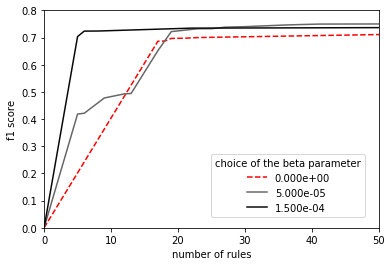

In [90]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import math
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
# name = "Greys"
# cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
# colors = cmap  # type: list

# # plt.set_prop_cycle(color=colors)

# color_map = get_cmap('viridis')
color_map = get_cmap('binary')
# color_map = get_cmap('winter')


beta_candidates = [i * 0.00001 for i in beta_candidates]
beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,8,12,15]
beta_candidates = [0,1,1.5,2,3,5,15]
beta_candidates = [0,1,1.5,2,3,8,15]
beta_candidates = [0,5,15]

beta_candidates = [i * 0.00001 for i in beta_candidates]



for count,b in enumerate(beta_candidates):
#     if count in [3]: 
#         continue
    plot_use_x = []
    plot_use_y = []

    
    current = 0
    for i in range(len (results[b] )):
        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = results[b][i]
        if f1_score <= current:
            continue
        else:
            current = f1_score
#     for i in range(len(lambda_candidates)):
#         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance) = results[b][i]
        plot_use_x.append(num)
#         plot_use_y.append(acc_score)
        plot_use_y.append(f1_score)
#     print(plot_use_y)

    tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
#     tmp = list( filter(lambda x:  (x[0]<=2 ) or (x[0]>=5 and x[1]<=30 ),tmp) )
    tmp = list( filter(lambda x:   (x[0]>=5 and x[1]<=30 ),tmp) )


    tmp.append((1000,0.80) ) 
#     tmp.append((1,0.5) ) 
    tmp.append((0,0) ) 
    


    
    tmp = sorted(tmp,key=lambda x:x[0])
    X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
    y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
#     clf = GaussianProcessRegressor()
#     clf.fit(X, y) 
#     x_virtul = [ 0.1 * i for i in range(50)]
#     x_for_predict = np.asarray(x_virtul) .reshape(-1, 1)
#     plt.plot(x_virtul,clf.predict(x_for_predict).reshape(-1),color=color_map(  math.sqrt(b*1000)  )  )
#     plt.plot(X,y  )
    if count == 0:
        plt.plot(X,y,'r--')
    else:
        plt.plot(X,y,color=color_map(  math.sqrt(b*5000)+0.1 )  )

    
plt.legend( [format(b, '.3e') for b in beta_candidates],loc=(0.5,0.05),title="choice of the beta parameter")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend([str(b) for b in beta_candidates], loc=5)
plt.xlim([0,50])
plt.ylim([0,0.8])
plt.ylabel('f1 score')
plt.xlabel('number of rules')
plt.show()

In [ ]:

b = beta_candidates[-1]
l = 0.0005
index = lambda_candidates.index(l)
lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) =  results[b][index]
print("parameter: ",beta,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)

for e in explanations:
#     print(e)
    print(e.string_representation)

In [12]:

b = beta_candidates[0]
l = 0.0005
index = lambda_candidates.index(l)
lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) =  results[b][index]
print("parameter: ",beta,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)

for e in explanations:
#     print(e)
    print(e.string_representation)
    
from utils import compute_metrics

parameter:  0.00015000000000000001 0.0005 metrics 4 0.6813186813186812 0.8812691914022518 0.5927342256214149 0.8010335917312662 0
IF 17.0 <= age <= 90.0 AND 2444.0 <= capital-loss <= 4356.0 THEN income=>50K 
IF 7262.0 <= capital-gain <= 99999.0 THEN income=>50K 
IF 9999.900000000001 <= capital-gain <= 99999.0 THEN income=>50K 
IF education is Bachelors,Masters,Prof-school AND marital-status is Married-civ-spouse THEN income=>50K 


# Test active query with first sample a large dataset.

In [60]:
%load_ext autoreload
%autoreload 2
from approach import explain_tabular
explanations,ADS = explain_tabular(predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed,beta=0,lambda_parameter=0.0003)


from utils import  rule_to_string,ruleset_predict
for e in explanations:
    print(rule_to_string(e,data_table.domain,target_class_idx=1))
    
our_prediction = ruleset_predict(explanations,test_data_table.X)

print(sum(our_prediction) )

import sklearn
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction))

from utils import  rule_to_string
print('number of rules:',len(explanations))
print("new instances",ADS.synthetic_data_table.X.shape[0])

lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.003,0.004,0.0045,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]

beta = 0
for lambda_parameter in  lambda_candidates:
    explanations = ADS.output_the_best(lambda_parameter)
    our_prediction = ruleset_predict(explanations,test_data_table.X)
    f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction)
    acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction)
    rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction)
    pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction)
    num = len(explanations)
    num_of_instance = ADS.synthetic_data_table.X.shape[0]

    print("parameter: ",beta,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
init transformer okay!
new cached!


KeyboardInterrupt: 

In [ ]:
%load_ext autoreload
%autoreload 2
from approach import explain_tabular

beta = 1.5e-04
explanations_active,ADS_active = explain_tabular(predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed,beta=beta,lambda_parameter=0.0005)

from utils import  rule_to_string,ruleset_predict
# explanations_active = ADS_active.output_the_best(0.01)
print("num of rules",len(explanations_active))
for e in explanations_active:
    print(rule_to_string(e,data_table.domain,target_class_idx=1))
    
our_prediction = ruleset_predict(explanations_active,test_data_table.X)

print(sum(our_prediction) )

from utils import label_with_blackbox
predicted_test_data_table = label_with_blackbox(test_data_table,black_box)
print(sum(predicted_test_data_table.Y) )
print("number of rules",len(explanations_active))
import sklearn
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction))

lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]

for lambda_parameter in  lambda_candidates:
    explanations = ADS_active.output_the_best(lambda_parameter)
    our_prediction = ruleset_predict(explanations,test_data_table.X)
    f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction)
    acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction)
    rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction)
    pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction)
    num = len(explanations)
    num_of_instance = ADS_active.synthetic_data_table.X.shape[0]

    print("parameter: ",beta,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)

In [13]:
from tqdm import tqdm_notebook
%load_ext autoreload
%autoreload 2

from utils import uniform_enlarge_dataset,estimated_enlarge_dataset

from approach import explain_tabular
from utils import ruleset_predict
from copy import deepcopy


lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.00015,0.0002,0.0003,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]


sampling_rate_candidates = [0,0.5,1,1.5,2]


sampling_results={}
sampling_results["uniform"]={}
sampling_results["estimated"]={}

for rate in sampling_rate_candidates:
    sampling_results["uniform"][rate] = []
    sampling_results["estimated"][rate] = []


for rate in tqdm_notebook(sampling_rate_candidates): 
    
    for mode in ["uniform","estimated"]:
        if mode == "uniform":
            print("uniform sampling")
            new_predicted_data_table = uniform_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
        elif mode == "estimated":
            print("estimated sampling")
            new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
        lambda_parameter = 0.0001
        print(new_predicted_data_table.X.shape)
        explanations,ADS = explain_tabular(new_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed,beta=0,lambda_parameter=lambda_parameter)
        for lambda_parameter in  lambda_candidates:
            explanations = ADS.output_the_best(lambda_parameter)
            our_prediction = ruleset_predict(explanations,test_data_table.X)
            f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction)
            acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction)
            rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction)
            pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction)
            num = len(explanations)
            num_of_instance = rate * predicted_data_table.X.shape[0]
            sampling_results[mode][rate].append( (lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,deepcopy(explanations) )  ) )
            print("parameter: ",mode,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)
  


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


uniform sampling
(43957, 12)
init transformer okay!
new cached!


best solution found in iteration 411
Now print Error Log
at iteration: 920 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
best solution found in iteration 853
parameter:  uniform 0 metrics 80 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  uniform 1e-07 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  uniform 1e-06 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  uniform 1e-05 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  uniform 3e-05 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 411
parameter:  uniform

best solution found in iteration 411
Now print Error Log
at iteration: 920 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
best solution found in iteration 853
parameter:  estimated 0 metrics 80 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  estimated 1e-07 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  estimated 1e-06 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  estimated 1e-05 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  estimated 3e-05 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 411
parameter

best solution found in iteration 857
Now print Error Log
at iteration: 900 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 907 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 910 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 924 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
best solution found in iteration 849
parameter:  uniform 0 metrics 31 0.7258150721539284 0.8949846468781986 0.6491395793499044 0.823030303030303 21978.5
best solution found in iteration 857
parameter:  uniform 1e-07 metrics 30 0.7258150721539284 0.8949846468781986 0.6491395793499044 0.823030303030303 21978.5
best solution found in iteration 857
parameter:  uniform 1e-06 metrics 30 0.7258150721539

best solution found in iteration 562
Now print Error Log
no error happens
best solution found in iteration 956
parameter:  estimated 0 metrics 78 0.7641129032258065 0.9041965199590584 0.7246653919694073 0.8081023454157783 21978.5
best solution found in iteration 956
parameter:  estimated 1e-07 metrics 78 0.7641129032258065 0.9041965199590584 0.7246653919694073 0.8081023454157783 21978.5
best solution found in iteration 956
parameter:  estimated 1e-06 metrics 78 0.7641129032258065 0.9041965199590584 0.7246653919694073 0.8081023454157783 21978.5
best solution found in iteration 892
parameter:  estimated 1e-05 metrics 66 0.7602635580334516 0.9031729785056295 0.7170172084130019 0.8090614886731392 21978.5
best solution found in iteration 892
parameter:  estimated 3e-05 metrics 66 0.7602635580334516 0.9031729785056295 0.7170172084130019 0.8090614886731392 21978.5
best solution found in iteration 750
parameter:  estimated 5e-05 metrics 52 0.7599797877716018 0.9027635619242579 0.71892925430210

best solution found in iteration 426
Now print Error Log
at iteration: 19 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 21 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 22 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 202 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
best solution found in iteration 420
parameter:  uniform 0 metrics 8 0.6943556975505858 0.8824974411463664 0.6233269598470363 0.7836538461538461 43957
best solution found in iteration 420
parameter:  uniform 1e-07 metrics 8 0.6943556975505858 0.8824974411463664 0.6233269598470363 0.7836538461538461 43957
best solution found in iteration 420
parameter:  uniform 1e-06 metrics 8 0.6943556975505858 0.88

best solution found in iteration 893
Now print Error Log
at iteration: 5 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 6 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 8 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 42 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 56 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 57 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 62 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
a

best solution found in iteration 792
Now print Error Log
at iteration: 947 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 948 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 949 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 951 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
best solution found in iteration 791
parameter:  uniform 0 metrics 5 0.6913445835601524 0.8839303991811669 0.607074569789675 0.8027812895069533 65935.5
best solution found in iteration 792
parameter:  uniform 1e-07 metrics 4 0.6913445835601524 0.8839303991811669 0.607074569789675 0.8027812895069533 65935.5
best solution found in iteration 792
parameter:  uniform 1e-06 metrics 4 0.6913445835601524

best solution found in iteration 344
Now print Error Log
at iteration: 991 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 992 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
best solution found in iteration 957
parameter:  estimated 0 metrics 147 0.7494887525562373 0.8996929375639714 0.7007648183556405 0.8054945054945055 65935.5
best solution found in iteration 957
parameter:  estimated 1e-07 metrics 147 0.7494887525562373 0.8996929375639714 0.7007648183556405 0.8054945054945055 65935.5
best solution found in iteration 957
parameter:  estimated 1e-06 metrics 147 0.7494887525562373 0.8996929375639714 0.7007648183556405 0.8054945054945055 65935.5
best solution found in iteration 957
parameter:  estimated 1e-05 metrics 147 0.7494887525562373 0.8996929375639714 0.7007648183556405 0.8054945054945055 65935.5
best solution found in iteratio

best solution found in iteration 882
Now print Error Log
at iteration: 4 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 10 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 11 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 711 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 918 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 921 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 955 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITI

best solution found in iteration 567
Now print Error Log
no error happens
best solution found in iteration 903
parameter:  estimated 0 metrics 113 0.7358588479501817 0.8958034800409417 0.6778202676864244 0.8047673098751419 87914
best solution found in iteration 905
parameter:  estimated 1e-07 metrics 112 0.7358588479501817 0.8958034800409417 0.6778202676864244 0.8047673098751419 87914
best solution found in iteration 905
parameter:  estimated 1e-06 metrics 112 0.7358588479501817 0.8958034800409417 0.6778202676864244 0.8047673098751419 87914
best solution found in iteration 905
parameter:  estimated 1e-05 metrics 112 0.7358588479501817 0.8958034800409417 0.6778202676864244 0.8047673098751419 87914
best solution found in iteration 905
parameter:  estimated 3e-05 metrics 112 0.7358588479501817 0.8958034800409417 0.6778202676864244 0.8047673098751419 87914
best solution found in iteration 644
parameter:  estimated 5e-05 metrics 78 0.7362467866323907 0.8949846468781986 0.6845124282982792 0.

In [14]:
from tqdm import tqdm_notebook
%load_ext autoreload
%autoreload 2

import Orange
disc = Orange.preprocess.Discretize()
disc.method = Orange.preprocess.discretize.EntropyMDL()
disc_predicted_test_data_table = disc(predicted_test_data_table)


disc = Orange.preprocess.Discretize()
disc.method = Orange.preprocess.discretize.EntropyMDL()

disc_predicted_data_table = disc(predicted_data_table)
# disc_predicted_test_data_table = disc(predicted_test_data_table)
disc_predicted_test_data_table = Orange.data.Table.from_table(disc_predicted_data_table.domain, predicted_test_data_table)


from utils import uniform_enlarge_dataset,estimated_enlarge_dataset

from competition_methods_explanation.passive_methods.brl import explain_tabular


from utils import ruleset_predict
from copy import deepcopy
import sklearn

sampling_rate_candidates = [0,0.5,1,1.5,2]

rate = 1.0

# new_predicted_data_table = uniform_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
        
disc_new_predicted_data_table =  Orange.data.Table.from_table(disc_predicted_data_table.domain, new_predicted_data_table)

sbrl = explain_tabular(disc_new_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed)

sbrl_prediction = sbrl.predict( (disc_predicted_test_data_table.X).astype(int)  )

our_prediction = ruleset_predict(explanations,test_data_table.X)
f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, sbrl_prediction)
acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, sbrl_prediction)
rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, sbrl_prediction)
pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, sbrl_prediction)
num = sbrl.n_rules
num_of_instance = rate * predicted_data_table.X.shape[0]
sbrl_results[mode].append( (0,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,deepcopy(explanations) )  ) )

print("parameter: ",mode,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
start the experiment of SBRL


first discretize data since SBRL only handles categorical data
initialize okay
start finding rule list
finished finding rule list
parameter:  uniform metrics 88 0.7604790419161677 0.901740020470829 0.7284894837476099 0.7954070981210856 0
first discretize data since SBRL only handles categorical data
initialize okay
start finding rule list
finished finding rule list
parameter:  estimated metrics 103 0.7497497497497497 0.8976458546571137 0.7160611854684512 0.7867647058823529 0
init transformer okay!
[1. 1. 0. ... 1. 0. 1.]
first discretize data since SBRL only handles categorical data
initialize okay
start finding rule list
finished finding rule list
parameter:  uniform metrics 111 0.7557557557557556 0.9001023541453429 0.7217973231357553 0.7930672268907563 21978.5
first discretize data since SBRL only handles categorical data
initialize okay
start finding rule list
finished finding rule list
parameter:  estimated metrics 121 0.7441375716519022 0.8994882292732855 0.6826003824091779 0.8178

0.0 0.0 0.6755260243632337
0.2275405509930159 2e-05 0.7044491525423728
0.5188707145619583 5e-05 0.6939443535188217
1.4301248947835385 0.00012000000000000002 0.7421513124034996
1.793479991810178 0.00015000000000000001 0.7234949387320192
0.0 0.0 0.6755260243632337
0.15060172441249403 2e-05 0.7023484434735119
0.13217462520190185 3.0000000000000004e-05 0.70199370409234
0.5009896034761244 5e-05 0.7381316998468607
1.116636713151489 0.00012000000000000002 0.7402061855670103
1.151898446208795 0.00015000000000000001 0.7236438075742069


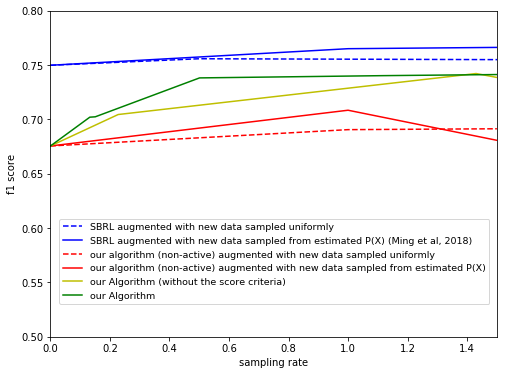

In [327]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,6))

sampling_rate_candidates = [0,0.5,1,1.5] 
# for count,mode in enumerate(["estimated"]):
for count,mode in enumerate(["uniform","estimated"]):
    plot_use_x = []
    plot_use_y = []
    for c,i in enumerate(sampling_rate_candidates):

#         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(sampling_results[mode][i],key=lambda x:x[1][1])
        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = sbrl_results[mode][c]
        
        plot_use_x.append(i)
        plot_use_y.append(f1_score)
        
    tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
 
    if mode == "uniform":
        del tmp[-2]
        tmp.append( (100,1) )
        tmp = sorted(tmp,key=lambda x:x[0])
        X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
        y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
        plt.plot(X,y,'b--',label = "SBRL augmented with new data sampled uniformly")
    else:
        del tmp[1]
        del tmp[-1]
        tmp.append( (100,1) )
        tmp = sorted(tmp,key=lambda x:x[0])
        X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
        y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
        plt.plot(X,y,'b',label = "SBRL augmented with new data sampled from estimated P(X) (Ming et al, 2018)")    


sampling_rate_candidates = [0,1,1.5] 


# as in our active methods, the largest beta produces a new sampling rate around 1.2, not very close to 2, so we only use [0,0.5,1,1.5]
lambda_idx = lambda_candidates.index(0.001)
# for count,mode in enumerate(["estimated"]):
for count,mode in enumerate(["uniform","estimated"]):
    plot_use_x = []
    plot_use_y = []
    for i in sampling_rate_candidates:
#         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(sampling_results[mode][i],key=lambda x:x[1][1])
        if mode == "uniform":
#             lambda_idx = lambda_candidates.index(0.002)
            lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance) = sampling_results[mode][i][lambda_idx]
        else:
#             lambda_idx = lambda_candidates.index(0.002)
            lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance) = sampling_results[mode][i][lambda_idx]
        plot_use_x.append(i)
        plot_use_y.append(f1_score)
        
    tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
   
    if mode == "uniform":

        tmp = sorted(tmp,key=lambda x:x[0])
        X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
        y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
        plt.plot(X,y,'r--',label="our algorithm (non-active) augmented with new data sampled uniformly")
    else:
        del tmp[-1]
        tmp.append( (100,0.9) )
        tmp = sorted(tmp,key=lambda x:x[0])
        X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
        y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
        plt.plot(X,y,'r',label = "our algorithm (non-active) augmented with new data sampled from estimated P(X)")



plot_use_x = []
plot_use_y = []
beta_candidates = [0,2,5,12,15]
# beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,8,12,15]
beta_candidates = [i * 0.00001 for i in beta_candidates]
lambda_idx = lambda_candidates.index(0.001)
for count,b in enumerate(beta_candidates):
#     lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(results[b],key =lambda x:x[1][1])
    lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance) = without_distance_results[b][lambda_idx]
    print(1.0* num_of_instance / predicted_data_table.X.shape[0],b,f1_score )
    plot_use_x.append(1.0* num_of_instance / data_table.X.shape[0])
    plot_use_y.append(f1_score)
        
tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
del tmp[2]
tmp = sorted(tmp,key=lambda x:x[0])
X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
plt.plot(X,y,'y',label ="our Algorithm (without the score criteria)"  )



plot_use_x = []
plot_use_y = []


beta_candidates = [0,2,5,12,15]
beta_candidates = [0,2,3,5,12,15]
# beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,8,12,15]
beta_candidates = [i * 0.00001 for i in beta_candidates]
lambda_idx = lambda_candidates.index(0.001)
for count,b in enumerate(beta_candidates):
#     lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(results[b],key =lambda x:x[1][1])
    lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance) = results[b][lambda_idx]
    print(1.0* num_of_instance / predicted_data_table.X.shape[0],b,f1_score )
    plot_use_x.append(1.0* num_of_instance / data_table.X.shape[0])
    plot_use_y.append(f1_score)
        
tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
del tmp[-1]
tmp.append( (100,1))
tmp = sorted(tmp,key=lambda x:x[0])
X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
plt.plot(X,y,'g',label ="our Algorithm"  )

plt.legend(loc=(0.02,0.1),prop={'size': 9.5})


# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend([str(b) for b in beta_candidates], loc=5)
plt.xlim([0,1.5])
plt.ylim([0.5,0.8])
plt.ylabel('f1 score')
plt.xlabel('sampling rate')
plt.show()

0.0 0.0 0.6755260243632337
0.037172691493960006 2.0000000000000003e-06 0.6909090909090908
0.05013990945696931 5e-06 0.6968085106382979
0.07138794731214596 1e-05 0.690578158458244
0.08217121277612212 1.5000000000000002e-05 0.6923901393354769
0.2275405509930159 2e-05 0.7044491525423728
0.35284482562504266 3.0000000000000004e-05 0.6835443037974683
0.0 0.0 0.6755260243632337
0.15060172441249403 2e-05 0.7023484434735119
0.13217462520190185 3.0000000000000004e-05 0.70199370409234


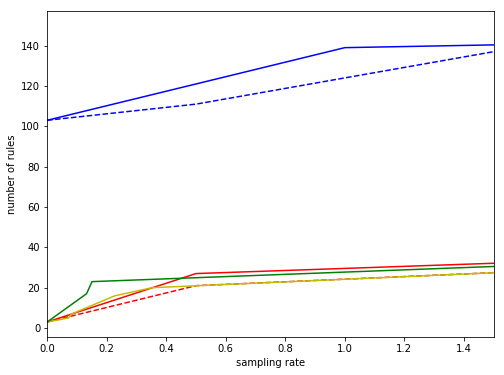

In [329]:
import matplotlib.pyplot as plt
import numpy as np
# plt.figure(figsize=(6,4))
plt.figure(figsize=(8,6))



# for count,mode in enumerate(["estimated"]):
for count,mode in enumerate(["uniform","estimated"]):
    plot_use_x = []
    plot_use_y = []
    for c,i in enumerate(sampling_rate_candidates):

#         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(sampling_results[mode][i],key=lambda x:x[1][1])
        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = sbrl_results[mode][c]
        
        plot_use_x.append(i)
        plot_use_y.append(num)
        
    tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
#     tmp = sorted(tmp,key=lambda x:x[0])
#     X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
#     y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)

#     if mode == "uniform":
#         plt.plot(X,y,'b--',label = "SBRL augmented with new data sampled uniformly")
#     else:
#         plt.plot(X,y,'b',label = "SBRL augmented with new data sampled from estimated P(X) (Ming et al, 2018)")
     

    if mode == "uniform":
        del tmp[-2]
        tmp.append( (5,150) )
        tmp = sorted(tmp,key=lambda x:x[0])
        X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
        y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
        plt.plot(X,y,'b--',label = "SBRL augmented with new data sampled uniformly")
    else:
        del tmp[1]
        del tmp[-1]
        tmp.append( (5,150) )
        tmp = sorted(tmp,key=lambda x:x[0])
        X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
        y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
        plt.plot(X,y,'b',label = "SBRL augmented with new data sampled from estimated P(X) (Ming et al, 2018)")
        

sampling_rate_candidates = [0,0.5,1,1.5] 
# sampling_rate_candidates = [0,1,1.5] 


# as in our active methods, the largest beta produces a new sampling rate around 1.2, not very close to 2, so we only use [0,0.5,1,1.5]
# lambda_idx = lambda_candidates.index(0.002)
# lambda_idx = lambda_candidates.index(0.0003)
lambda_idx = lambda_candidates.index(0.001)




# for count,mode in enumerate(["estimated"]):
for count,mode in enumerate(["uniform","estimated"]):
    plot_use_x = []
    plot_use_y = []
    for i in sampling_rate_candidates:
#         lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(sampling_results[mode][i],key=lambda x:x[1][1])
        if mode == "uniform":
#             lambda_idx = lambda_candidates.index(0.0005)
#             lambda_idx = lambda_candidates.index(0.002)


            lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance) = sampling_results[mode][i][lambda_idx]
        else:
#             lambda_idx = lambda_candidates.index(0.0005)
#             lambda_idx = lambda_candidates.index(0.002)
            lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance) = sampling_results[mode][i][lambda_idx]
        plot_use_x.append(i)
        plot_use_y.append(num)
        
    tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
   
    if mode == "uniform":
        del tmp[-2:]
        tmp.append( (5,50) )
        tmp = sorted(tmp,key=lambda x:x[0])
        X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
        y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
        plt.plot(X,y,'r--',label="our algorithm (non-active) augmented with new data sampled uniformly")
    else:
        del tmp[-2:]
        tmp.append( (5,50) )
        tmp = sorted(tmp,key=lambda x:x[0])
        X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
        y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
        plt.plot(X,y,'r',label = "our algorithm (non-active) augmented with new data sampled from estimated P(X)")



plot_use_x = []
plot_use_y = []
# beta_candidates = [0,2,15]
beta_candidates = [0,2]
beta_candidates = [0,2,5,12,15]
beta_candidates = [0,0.2,0.5,1,1.5,2,3]
beta_candidates = [i * 0.00001 for i in beta_candidates]
# lambda_idx = lambda_candidates.index(0.0005)
lambda_idx = lambda_candidates.index(0.001)

# beta_candidates = [0,2,5,12,15]
# beta_candidates = [i * 0.00001 for i in beta_candidates]
for count,b in enumerate(beta_candidates):
#     lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(results[b],key =lambda x:x[1][1])
    lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance) = without_distance_results[b][lambda_idx]
    print(1.0* num_of_instance / predicted_data_table.X.shape[0],b,f1_score )
    plot_use_x.append(1.0* num_of_instance / data_table.X.shape[0])
    plot_use_y.append(num)
    
tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
del tmp[2]
tmp.append( (5,50) )
tmp = sorted(tmp,key=lambda x:x[0])
X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
plt.plot(X,y,'y',label ="our Algorithm (without the score criteria)"  )



plot_use_x = []
plot_use_y = []



beta_candidates = [0,2,3]
beta_candidates = [i * 0.00001 for i in beta_candidates]
# lambda_idx = lambda_candidates.index(0.002)
lambda_idx = lambda_candidates.index(0.001)


for count,b in enumerate(beta_candidates):
#     lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = max(results[b],key =lambda x:x[1][1])
    lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance) = results[b][lambda_idx]
    print(1.0* num_of_instance / predicted_data_table.X.shape[0],b,f1_score )
    plot_use_x.append(1.0* num_of_instance / data_table.X.shape[0])
    plot_use_y.append(num)
        
tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
# del tmp[-1]
tmp.append( (5,50))
tmp = sorted(tmp,key=lambda x:x[0])
X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
plt.plot(X,y,'g',label ="our Algorithm (active)"  )



# plt.legend(loc=(-0.2,-0.60))


# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend([str(b) for b in beta_candidates], loc=5)
plt.xlim([0,1.5])
# plt.ylim([0,140])
plt.ylabel('number of rules')
plt.xlabel('sampling rate')
plt.show()

In [74]:
import pickle
filehandler = open("without-distance.results","rb")
old_results = pickle.load(filehandler)
filehandler.close()

12
